# Practica Fifa

In [4]:
#importamos las librerias con las que vamos a trabajar
import pandas
import pandas as pd
from matplotlib import pyplot as plt


In [17]:
# leemos el dataset 
datos = pd.read_csv('C://Users/Pulpin/Desktop/UPS Final/Simulacion/Simulacion/Csv/datos_fifa.csv')
datos.head()
#print(datos)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


Parte1. con los datos de la fifa clasificar a los jugadores de acuerdo al peso en las siguientes escalas:

    a. Debajo 125 Lbs.
    b. 125-150
    c. 150-175
    d. 175 o superior

In [28]:
#obtenemos datos conforme a los pesos

#condiciones
#Debajo 125 Lbs.
peso1 = datos.loc[datos['Weight'] < 125]
#entre 125 y 150 libras
peso2=datos.loc[(datos['Weight'] >= 125) & (datos['Weight'] < 150)]
#entre 150 y 175 libras
peso3=datos.loc[(datos['Weight'] >= 150) & (datos['Weight'] < 175)]
#175 libras o mayor aun
peso4=datos.loc[datos['Weight'] >= 175]


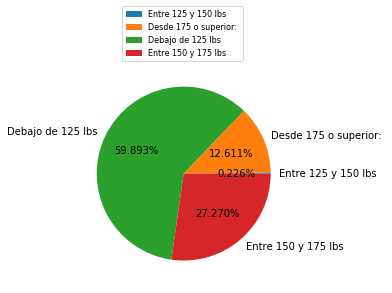

In [42]:
#definimos las etiquetas
etiquetas= {'Debajo de 125 lbs','Entre 125 y 150 lbs','Entre 150 y 175 lbs','Desde 175 o superior: '}
plt.pie([len(peso1), len(peso2), len(peso3), len(peso4)], labels=etiquetas, autopct='%1.3f%%')
plt.legend( prop={'size': 8}, bbox_to_anchor=(0.2, 1), )

Generar un grafico de barras de acuerdo a su habilidad  en base a los siguientes segmentos:
40, 50,60,70,80,90

In [43]:
dato_40=datos.loc[(datos['Overall'] >= 40) & (datos['Overall'] < 50)]
dato_50=datos.loc[(datos['Overall'] >= 50) & (datos['Overall'] < 60)]
dato_60=datos.loc[(datos['Overall'] >= 60) & (datos['Overall'] < 70)]
dato_70=datos.loc[(datos['Overall'] >= 70) & (datos['Overall'] < 80)]
dato_80=datos.loc[(datos['Overall'] >= 80) & (datos['Overall'] < 90)]
dato_90=datos.loc[(datos['Overall'] >= 90) & (datos['Overall'] < 100)]

In [49]:
#definimos las etiquetas
etiquetas= ['40','50','60','70','80','90']
valores=[len(dato_40), len(dato_50), len(dato_60), len(dato_70), len(dato_80), len(dato_90)]

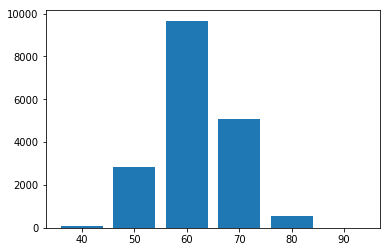

In [54]:
#graficamos
plt.bar(etiquetas, valores)
plt.show()


Investigar alguna herramienta o software que permita generar reportes con Python utilizando CodeLabs. 

# Reportlab

ReportLab es un toolkit de código abierto para crear documentos PDF desde Python. Se trata de una librería muy extensa y con muchas funcionalidades, desde pequeños textos y figuras geométricas a grandes gráficos e ilustraciones, todo ello puede ser incluido dentro de un PDF. En este artículo estaremos sopesando sus características generales y sus principales funciones para crear este tipo de documentos.

La librería se instala sencillamente vía pip:
pip install reportlab



es una librearia muy completa con muchas características de ReportLab, aunque no se trate sino de una pequeña selección de su vasta colección de funcionalidades  Aquellos que requieran de un uso más exhausto de la librería, ya habrán conocido las bases y los dirijo nuevamente a la documentación oficial  on el fin de dar un facil uso a diferencia herramientas más complejas.



In [58]:
pip install reportlab

Note: you may need to restart the kernel to use updated packages.


In [62]:
import itertools
from random import randint
from statistics import mean
from reportlab.lib.pagesizes import A4
from reportlab.pdfgen import canvas
def grouper(iterable, n):
    args = [iter(iterable)] * n
    return itertools.zip_longest(*args)
def export_to_pdf(data):
    c = canvas.Canvas("pruebaReportLab.pdf", pagesize=A4)
    w, h = A4
    max_rows_per_page = 45
    # Margin.
    x_offset = 50
    y_offset = 50
    # Space between rows.
    padding = 15
    
    xlist = [x + x_offset for x in [0, 200, 250, 300, 350, 400, 480]]
    ylist = [h - y_offset - i*padding for i in range(max_rows_per_page + 1)]
    
    for rows in grouper(data, max_rows_per_page):
        rows = tuple(filter(bool, rows))
        c.grid(xlist, ylist[:len(rows) + 1])
        for y, row in zip(ylist[:-1], rows):
            for x, cell in zip(xlist, row):
                c.drawString(x + 2, y - padding + 3, str(cell))
        c.showPage()
    
    c.save()
data = [("NOMBRE", "NOTA 1", "NOTA 2", "NOTA 3", "PROM.", "ESTADO")]
for i in range(1, 101):
    exams = [randint(0, 10) for _ in range(3)]
    avg = round(mean(exams), 2)
    state = "Aprobado" if avg >= 4 else "Reprobado"
    data.append((f"Alumno {i}", *exams, avg, state))
export_to_pdf(data)